FY18-Q1 134109440
FY18-Q2 233887940
FY18-Q3 410185180
FY18-Q4 697505300
FY19-Q1 368167160
FY19-Q2 469469110
FY19-Q3 598644499


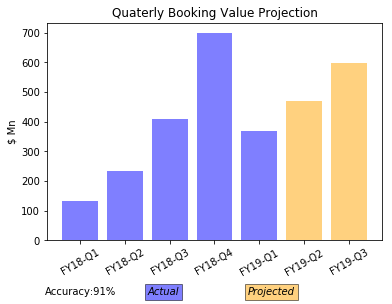

In [121]:

import pandas as pd
import io

from matplotlib.backends.backend_template import FigureCanvas


def get_booking_df():
    input_str = io.StringIO(
        """ID,Field,Booking Type,Offer Type,ACCURACY,FY18-Q1,FY18-Q2,FY18-Q3,FY18-Q4,FY19-Q1,FY19-Q2,FY19-Q3,MAPE
            0,Booking Type - ALL | Offer Type - ALL,ALL,ALL,87%,149731107.47,252525869.77,459474430.39,788733490.46,407114480.10,526715890.00,688527052.55,0.13
            1,Booking Type - NEW | Offer Type - ALL,NEW,ALL,91%,134109440.00,233887940.00,410185180.00,697505300.00,368167160.00,469469110.00,598644499.54,0.09
            2,Booking Type - REPLACE | Offer Type - ALL,REPLACE,ALL,74%,11284842.40,16041752.80,60907638.00,143575368.00,62792290.00,86306510.00,118626246.44,0.26
            3,Booking Type - MODIFY | Offer Type - ALL,MODIFY,ALL,91%,23653607.00,16215960.00,15496049.00,17133809.00,20698816.00,18561955.00,16645694.78,0.09
            4,Booking Type - CANCEL | Offer Type - ALL,CANCEL,ALL,82%,-18510487.00,-10355517.00,-9960941.00,-40674903.00,-26382440.00,-25368350.00,-24393239.66,0.18
            5,Booking Type - CANCEL-PDODR | Offer Type - ALL,CANCEL-PDODR,ALL,87%,-2624642.40,-6164431.90,-21016261.00,-34247877.00,-23585798.00,-22253335.00,-20996148.56,0.13
            6,Booking Type - NEW | Offer Type - WEBEX,NEW,WEBEX,97%,64931883.00,130758310.00,212868620.00,276983370.00,159955790.00,207706440.00,269711807.35,0.03
            7,Booking Type - NEW | Offer Type - ELA2,NEW,ELA2,90%,4678739.00,19511386.00,55003813.40,201708534.00,64175662.00,104520670.00,170229182.17,0.10
            8,Booking Type - NEW | Offer Type - UMBRELLA,NEW,UMBRELLA,84%,22444413.00,32564129.00,40254703.00,69527850.00,38263522.00,47407473.00,58736581.97,0.16
            9,Booking Type - NEW | Offer Type - N9K_SW_SUB,NEW,N9K_SW_SUB,74%,0.00,0.00,5130868.60,11401153.00,23821661.00,28837618.00,34909749.24,0.26
            10,Booking Type - NEW | Offer Type - TETRATION,NEW,TETRATION,94%,7209396.00,6964056.00,8845270.90,14810575.00,8182623.70,9242081.50,10438714.23,0.06             
            """)
    # print(pd.read_csv(input_str, delimiter=',', ))
    df = pd.read_csv(input_str, delimiter=',', index_col='ID')
    return round(df, 2)


def show_offer_type(kind_id=None):
    df = get_booking_df()
    if kind_id is None:
        return dict(zip(df.index, df['Field']))
    else:
        return df.at[kind_id, 'Field']


def get_offer_accuracy(kind_id=None):
    df = get_booking_df()
    return df.at[kind_id, 'ACCURACY']


from functools import lru_cache


@lru_cache()
def get_color(kind, style):
    if kind == 'Real' and style == 'bar':
        return 'blue'  # 'green'
    elif kind == 'Predict' and style == 'bar':
        return 'orange'
    elif kind == 'Real' and style == 'line':
        return 'wheat'

    elif kind == 'Predict' and style == 'line':
        return 'springgreen'
    else:
        return 'red'


def show_booking_img(book_type=1):
    df = get_booking_df()
    # print(df.columns)
    df = df.loc[book_type].T.to_frame()
    df['kind'] = 'Real'
    df.loc[-3:, 'kind'] = 'Predict'

    xy = df
    xy = xy.loc[[True if 'FY' in index else False for index in xy.index]]

    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    import matplotlib.pyplot as plt
    fig, ax2 = plt.subplots()

    # xmajorLocator = MultipleLocator(2000000000)
    # ax2.yaxis.set_major_locator(xmajorLocator)
    ax2.get_yaxis().get_major_formatter().set_scientific(False)
    ax2.set_ylabel('$ Mn')
    ax2.set_title('Quaterly Booking Value Projection')
    for x, y, kind in zip(xy.index, xy.iloc[:, 0], xy.kind):
        ax2.bar(x, int(y) / 1000000, color=get_color(kind, 'bar'), alpha=0.5, )

        print(x, int(y))

    for tick in ax2.get_xticklabels():
        tick.set_rotation(30)

    left = 0.1
    top = -0.25
    ax2.text(left, top, f'Accuracy:{get_offer_accuracy(book_type)}',
             horizontalalignment='center',
             verticalalignment='baseline',
             # rotation=45,
             transform=ax2.transAxes)

    left = 0.3
    ax2.text(left, top, 'Actual', style='italic',
             bbox={'facecolor': get_color('Real', 'bar'), 'alpha': 0.5, 'pad': 3},
             transform=ax2.transAxes)

    left = 0.6
    ax2.text(left, top, 'Projected', style='italic',
             bbox={'facecolor': get_color('Predict', 'bar'), 'alpha': 0.5, 'pad': 3},
             transform=ax2.transAxes)

    canvas = FigureCanvas(fig)
    return canvas


# for i in range(0, 11):
#     show_booking_img(i)

canvas = show_booking_img(1)

plt.show(canvas)
 



In [122]:
xx = show_offer_type()

In [128]:
xx

{0: 'Booking Type - ALL | Offer Type - ALL',
 1: 'Booking Type - NEW | Offer Type - ALL',
 2: 'Booking Type - REPLACE | Offer Type - ALL',
 3: 'Booking Type - MODIFY | Offer Type - ALL',
 4: 'Booking Type - CANCEL | Offer Type - ALL',
 5: 'Booking Type - CANCEL-PDODR | Offer Type - ALL',
 6: 'Booking Type - NEW | Offer Type - WEBEX',
 7: 'Booking Type - NEW | Offer Type - ELA2',
 8: 'Booking Type - NEW | Offer Type - UMBRELLA',
 9: 'Booking Type - NEW | Offer Type - N9K_SW_SUB',
 10: 'Booking Type - NEW | Offer Type - TETRATION'}